<a href="https://colab.research.google.com/github/dejanbatanjac/pytorch-learning-101/blob/master/WD_single_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0
Train loss: 0.40250825516098293
Validation loss: 0.36129179710074316
wd_factor 1e-05


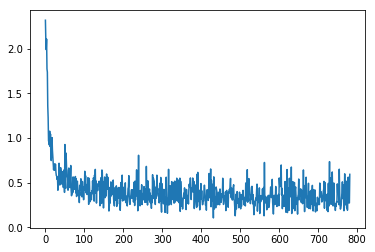

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.optim import *
import torchvision
import matplotlib.pyplot as plt

dl = DataLoader( torchvision.datasets.MNIST('/data/mnist', train=True, download=True), shuffle=False)

tensor = dl.dataset.data
tensor = tensor.to(dtype=torch.float32)
tr = tensor.reshape(tensor.size(0), -1) 
tr = tr/128 # tr = tr/255
targets = dl.dataset.targets
targets = targets.to(dtype=torch.long)

x_train = tr[0:50000-1]
y_train = targets[0:50000-1]
x_valid = tr[50000:60000-1]
y_valid = targets[50000:60000-1]

bs=64

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, drop_last=False, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

loaders={}
loaders['train'] = train_dl
loaders['valid'] = valid_dl


class M(nn.Module):
    'custom module'
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)
      
    def forward(self, xb):
        return self.lin(xb)

#     def forward(self, xb):
#         return F.relu(self.lin(xb))

model = M()
criterion = nn.CrossEntropyLoss()

bs=64
epochs = 1
lr = 0.1
wd_factor = 0.00001
# optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0.1)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)#, momentum=0.9)
losses=[]
for epoch in range(0,epochs):
    train_loss = 0
    valid_loss = 0    
    print(f"Epoch {epoch}")

    model.train()
    for i, (data,target) in enumerate(loaders['train']):                
        optimizer.zero_grad()
        output = model(data)
        wd = 0.
        for p in model.parameters(): 
            wd += (p**2).sum()
         
        loss = criterion(output, target)+wd*wd_factor 
        train_loss += loss.item()
        loss.backward()            
        optimizer.step()
        if (i%1==0):
            #print(f"Batch {i}, loss {loss.item()}")
            losses.append(loss.item())
    
    model.eval()
    for i, (data,target) in enumerate(loaders['valid']):                
        output = model(data)
        loss = criterion(output,target)
        valid_loss += loss.item()        
        
    train_loss = train_loss/len(loaders['train'])
    valid_loss = valid_loss/len(loaders['valid'])        
        
            
    print(f"Train loss: {train_loss}")
    print(f"Validation loss: {valid_loss}")
    plt.plot(losses)
    print("wd_factor", wd_factor)